# Libraries

In [1]:
from PIL import Image
import numpy as np
import os
from random import shuffle
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_otsu

# Applying otsu segmentation and normalize the image 

In [2]:
def normalizeImage(imgdir,sizeRows,sizeColumns):
    img = Image.open(imgdir)
    img = img.resize((sizeRows,sizeColumns),Image.ANTIALIAS)
    img  = np.asarray(img.convert('L'))
    val = threshold_otsu(np.array(img))
    otsuApplied = np.array(img)>val
    return otsuApplied.astype(int)

In [3]:
DIR1 = "/Users/jasonsolano/Documents/TrainingImages/Sedan/"
DIR2 = "/Users/jasonsolano/Documents/TrainingImages/buses/"
DIR3 = "/Users/jasonsolano/Documents/TrainingImages/motorcycles/"
paths = [DIR1,DIR2,DIR3]

In [4]:
# # Want to know how we should format the height x width image data dimensions
# # for inputting to a keras model
# def get_size_statistics():
#     heights = []
#     widths = []
#     img_count = 0
#     for tempPath in paths:
#         for img in os.listdir(tempPath):
#             path = os.path.join(tempPath, img)
#             if "DS_Store" not in path:
#                 data = np.array(Image.open(path))
#                 heights.append(data.shape[0])
#                 widths.append(data.shape[1])
#                 img_count += 1
#     avg_height = sum(heights) / len(heights)
#     avg_width = sum(widths) / len(widths)
#     print("Average Height: " + str(avg_height))
#     print("Max Height: " + str(max(heights)))
#     print("Min Height: " + str(min(heights)))
#     print('\n')
#     print("Average Width: " + str(avg_width))
#     print("Max Width: " + str(max(widths)))
#     print("Min Width: " + str(min(widths)))

# get_size_statistics()

In [5]:
#build vector for labels
def label_img(name):
    if "sedan" in name: #label for vehicules (specifically sedan)
        return np.array([1,0,0])
    elif "bus" in name: #Label for buses
        return np.array([0,1,0])
    elif "moto" in name: #Label for motorcycles
        return np.array([0,0,1])


In [6]:
IMG_SIZE = 300

def load_training_data():
    train_data = [] 
    for tempPath in paths:
        for img in os.listdir(tempPath):
            label = label_img(img)  # read the images and assigned the label
            path = os.path.join(tempPath, img)
            if "DS_Store" not in path: #validate for Mac Os users
                train_data.append([normalizeImage(path,IMG_SIZE,IMG_SIZE), label]) #normaliza data and 
    shuffle(train_data)
    return train_data

In [7]:
train_data = load_training_data()

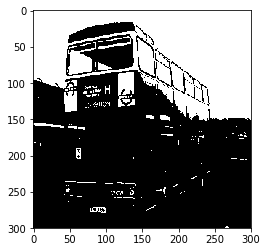

In [8]:
plt.imshow(train_data[200][0], cmap='gray', interpolation='nearest')

In [9]:
trainImages = np.array([i[0] for i in train_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
trainLabels = np.array([i[1] for i in train_data])
del train_data

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers. normalization import BatchNormalization

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [11]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation = 'softmax'))

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [13]:
model.fit(trainImages, trainLabels, batch_size = 10, epochs = 5, verbose = 1)

Epoch 1/5
2451/2451 [==============================] - 348s 142ms/step - loss: 0.8136 - acc: 0.6932
Epoch 2/5
2451/2451 [==============================] - 349s 142ms/step - loss: 0.4883 - acc: 0.8250
Epoch 3/5
2451/2451 [==============================] - 342s 140ms/step - loss: 0.3420 - acc: 0.8747
Epoch 4/5
2451/2451 [==============================] - 342s 139ms/step - loss: 0.2560 - acc: 0.9045
Epoch 5/5
2451/2451 [==============================] - 345s 141ms/step - loss: 0.1549 - acc: 0.9421


In [ ]:
# Test on Test Set
TEST_DIR = './test'
def load_test_data(path):
    return np.array(normalizeImage(path,IMG_SIZE,IMG_SIZE)).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [ ]:
ynew = model.predict_classes(load_test_data("/Users/jasonsolano/Downloads/motot.jpg"))
ynew

In [ ]:
from PIL import Image
from skimage import data
from skimage.filters import threshold_otsu

IMG_SIZE = 300
camera = data.camera()
img = Image.open("/Users/jasonsolano/Documents/TrainingImages/buses/coaster.jpeg")
img = img.resize((IMG_SIZE, IMG_SIZE))
img  = np.asarray(img.convert('L'))
# print(np.array(img))
# camera = data.camera(np.array(img))
Segmentation = filters.threshold_otsu(np.array(img))
ax[2].imshow(Segmentation, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

In [29]:
DIR1 = "/Users/jasonsolano/Documents/testCNN/cars/"
DIR2 = "/Users/jasonsolano/Documents/testCNN/buses/"
DIR3 = "/Users/jasonsolano/Documents/testCNN/motorcycles/"
paths = [DIR1,DIR2,DIR3]
test_data = list()

In [30]:
IMG_SIZE = 300

def load_test_data():
    for tempPath in paths:
        for img in os.listdir(tempPath): #list the images of directory
            if('cars' in tempPath): #assigned labels
                label = np.array([1,0,0])
            elif('buses' in tempPath):
                label = np.array([0,1,0])
            else:
                label = np.array([0,0,1])
            path = os.path.join(tempPath, img)
            if "DS_Store" not in path: #validate for Mac Os users
                test_data.append([normalizeImage(path,IMG_SIZE,IMG_SIZE), label]) #normaliza data  
    shuffle(test_data)
    return test_data
load_test_data()
testImages = np.array([i[0] for i in test_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
testLabels = np.array([i[1] for i in test_data])

/anaconda3/lib/python3.6/site-packages/PIL/Image.py:916: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


In [31]:
len(testImages)

100

In [32]:
loss, acc = model.evaluate(testImages, testLabels, verbose = 1)
print(acc * 100)

100/100 [==============================] - 8s 81ms/step
82.0


In [ ]:
# import matplotlib.pyplot as plt
# from skimage import data
# from skimage.filters import threshold_otsu
# from skimage.filters import threshold_yen
# from skimage.filters import try_all_threshold
# IMG_SIZE = 300

# img = Image.open("/Users/jasonsolano/Documents/TrainingImages/motorcycles/moto6.jpg")
# img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)

# image = data.camera()
# image  = np.asarray(img.convert('L'))
# print(np.shape(image))
# fig, ax = try_all_threshold(image, figsize=(10, 8), verbose=False)
# val = threshold_otsu(np.array(image))
# otsuApplied = np.array(image)>val

# print(otsuApplied)
# print(np.shape(otsuApplied.astype(int)))

# plt.imshow(otsuApplied, cmap='gray', interpolation='nearest')

# plt.show()


def normalizeImages(imgdir,sizeRows,sizeColumns):
    
    img = Image.open(imgdir) # get image
    img = img.resize((sizeRows,sizeColumns),Image.ANTIALIAS) # reshape the image size 
    
    #draw image
    plt.subplot(121)
    plt.imshow(img, interpolation='nearest')
    
    
    img  = np.asarray(img.convert('L')) # get the scalegray mask of image
    
    val = threshold_otsu(np.array(img)) # get the value of otsu method
    
    otsuApplied = np.array(img)>val # applied the threshold tehcnique
    
    #draw image
    plt.subplot(122)
    plt.imshow(otsuApplied, cmap='gray', interpolation='nearest')
    plt.show()
    
    
    
    

In [ ]:
normalizeImages("/Users/jasonsolano/Documents/TrainingImages/Sedan/sedan11.jpg",300,300)